In [1]:
import sys
import spotipy
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
from spotipy.oauth2 import SpotifyClientCredentials
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
CCM = SpotifyClientCredentials(client_id=open("secrets.txt").read().splitlines()[0], 
                               client_secret=open("secrets.txt").read().splitlines()[1])
sp = spotipy.Spotify(client_credentials_manager = CCM)

In [3]:
def features(playlist):
    data = pd.DataFrame(columns=['name','danceability','energy','key',
                        'loudness','speechiness','acousticness', 
                        'instrumentalness','liveness','valence',
                        'tempo','duration_ms'])
    tracks = playlist['items']
    while playlist['next']:
        playlist = sp.next(playlist)
        tracks.extend(playlist['items'])
    for i in range(0, len(tracks)):
        song_features = sp.audio_features(tracks[i]['track']['id'])[0]
        song_features['name'] = tracks[i]['track']['name']
        for key in data.keys():
            data.loc[i, key] = song_features[key]
            
    return data

In [19]:
# UPLOADING PLAYLISTS
jmg2020 = features(sp.user_playlist_tracks('37i9dQZF1EM0PgBRhtOGv1', '37i9dQZF1EM0PgBRhtOGv1'))
mc2020 = features(sp.user_playlist_tracks('37i9dQZF1ELZUWO0hJNIlQ', '37i9dQZF1ELZUWO0hJNIlQ'))
thork2020 = features(sp.user_playlist_tracks('37i9dQZF1EM7IWKSg0vASw', '37i9dQZF1EM7IWKSg0vASw'))
j2020 = features(sp.user_playlist_tracks('37i9dQZF1EM3kb9B93DM5f', '37i9dQZF1EM3kb9B93DM5f'))
jlg2020 = features(sp.user_playlist_tracks('37i9dQZF1EM1drSevEQRDk', '37i9dQZF1EM1drSevEQRDk'))
cts2020 = features(sp.user_playlist_tracks('37i9dQZF1EM3RpZ6Fk7mog', '37i9dQZF1EM3RpZ6Fk7mog'))

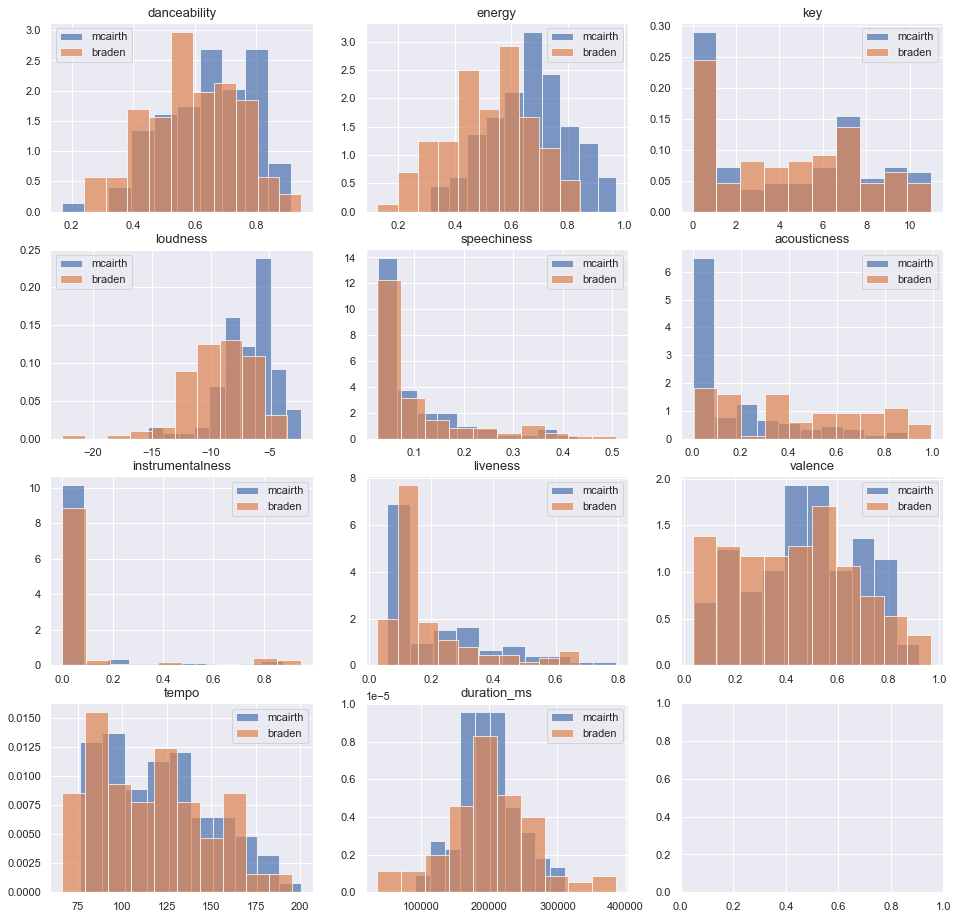

In [51]:
sns.set()
fig, ax = plt.subplots(4, 3, figsize=(16,16))
for _ in range(1, 12):
    plt.subplot(4, 3, _)
    plt.title(jmg2020.columns[_], fontsize=13)
#     plt.hist(list(jlg2020.iloc[:,_]), density=True,
#              alpha=.7, label='jason')
    plt.hist(list(mc2020.iloc[:,_]), density=True,
             alpha=.7, label='mcairth')
    plt.hist(list(thork2020.iloc[:,_]), density=True,
             alpha=.7, label='braden')
#     plt.hist(list(j2020.iloc[:,_]), density=True,
#              alpha=.7, label='J')
#     plt.hist(list(jlg2020.iloc[:,_]), density=True,
#              alpha=.7, label='jakes')
    plt.legend()
plt.savefig('foo.png')
plt.show()

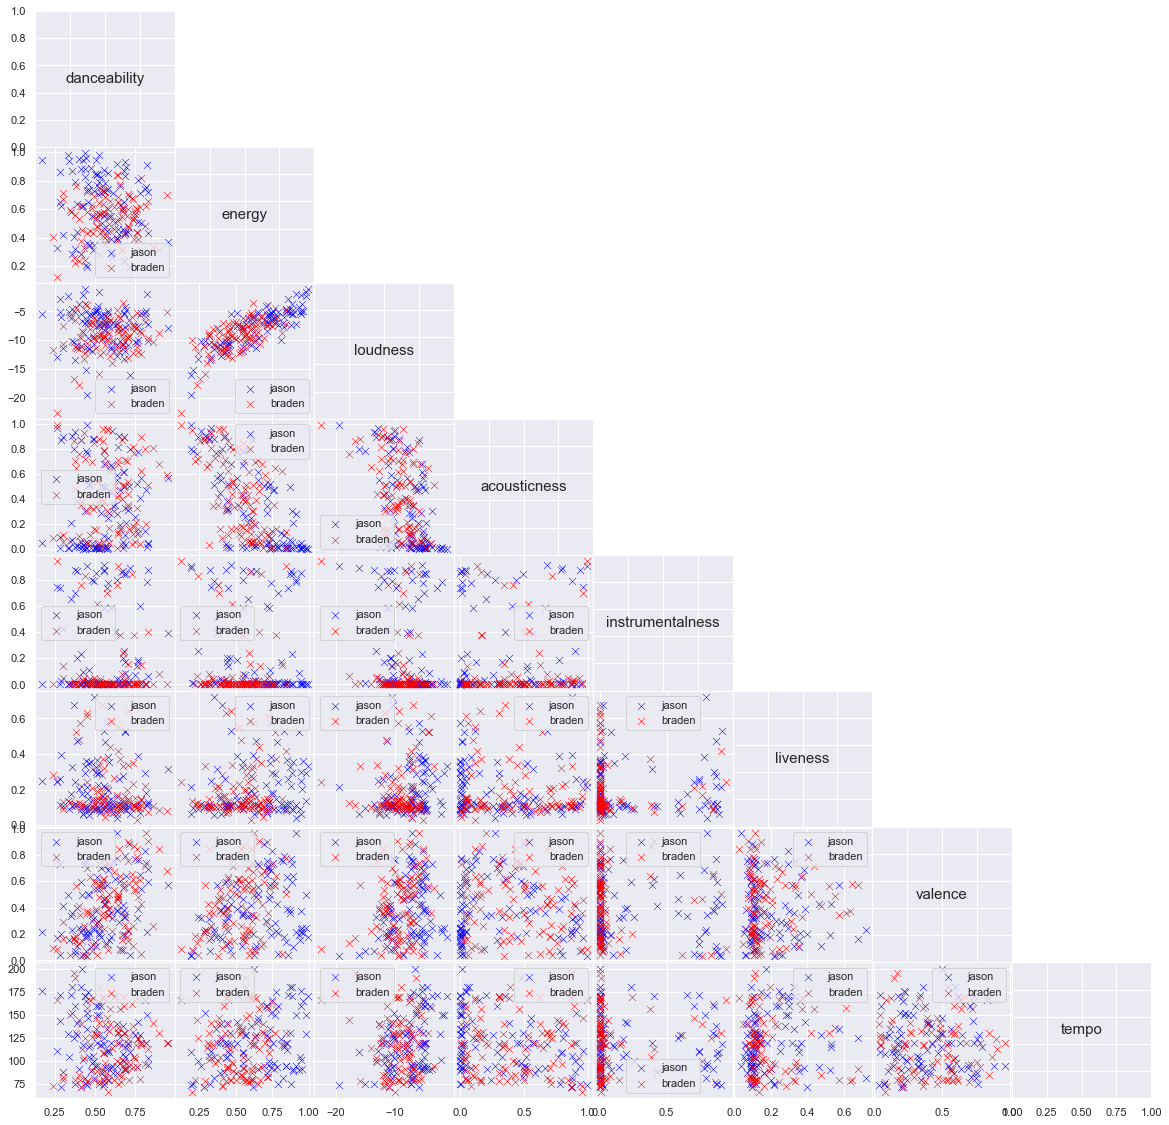

In [40]:
import matplotlib.gridspec as gridspec
features = ['danceability', 'energy', 'loudness',
            'acousticness', 'instrumentalness', 
            'liveness', 'valence', 'tempo']
plt.figure(figsize = (20, 20))
gs1 = gridspec.GridSpec(len(features), len(features))
gs1.update(wspace=0, hspace=0)
for i in range(0, len(features)):
    f_y = features[i]
    for j in range(0, len(features)):
        ax = plt.subplot(gs1[i, j])
        f_x = features[j]
        if (i < len(features) - 1): 
            ax.tick_params(axis='x', labelbottom=False, 
                           labelleft=False, direction='in') 
        if (j > 0):
            ax.tick_params(axis='y', labelbottom=False, 
                           labelleft=False, direction='in') 
        if j == i:
            ax.annotate(f_x, (0.5, 0.5), xycoords='axes fraction', 
                        ha='center', va='center', fontsize=15)
            continue 
        if j > i:
            ax.axis('off')
            continue    
        ax.scatter(jmg2020[f_x], jmg2020[f_y], color='blue',
                   s = 50, marker='x', linewidth=.5, label='jason')
        ax.scatter(thork2020[f_x], thork2020[f_y], color='red',
                   s = 50, marker='x', linewidth=.5, label='braden')
        plt.legend()